# Random variables : basics

In this notebook, we show the basics on how to manipulate random variables in a python notebook.

In [17]:
import numpy as np # this is the basis numerical package used in python
import scipy as sp # another one, with more specialized modules
import scipy.stats as stats 
import pylab as pl # to make nice plots

# stuff to make plots look nice
%matplotlib inline
pl.rcParams['figure.figsize'] = (10.0, 8.0)
pl.rcParams['font.size'] = 18

In [18]:
# let's start with a uniform random variable
x = np.random.uniform(-2, 5, size=100000)
print(x)

[ 0.95357714 -1.43530305  4.26095568 ...  3.00667378  4.01075171
  2.71926498]


Text(0, 0.5, 'variable')

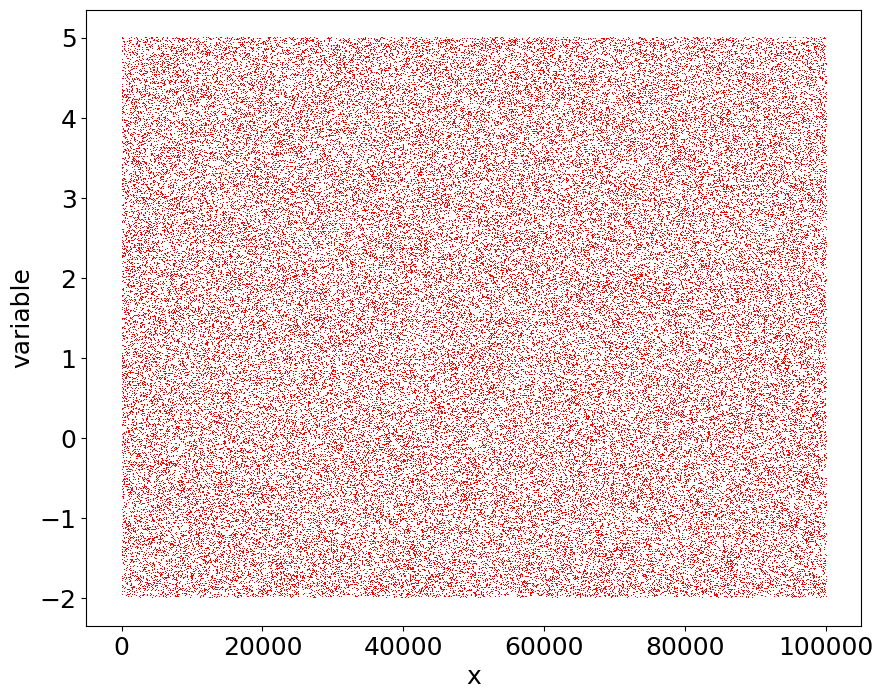

In [19]:
# How to display x ?
pl.plot(x, 'r,')
pl.xlabel('x')
pl.ylabel('variable')

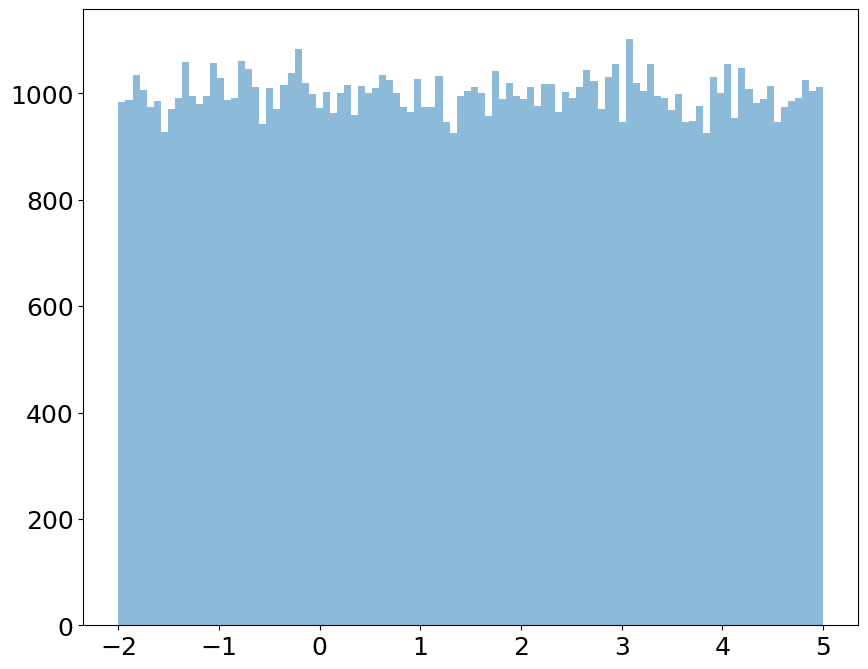

In [5]:
# better to display the values in a histogram
_ = pl.hist(x, bins=100, histtype='stepfilled', alpha=0.5)

In [7]:
# let's try another important one: the binomial distributionhelp
N = 12
p = 0.17
x = np.random.binomial(N, p, size=10000)

2.04 1.3012301871690497


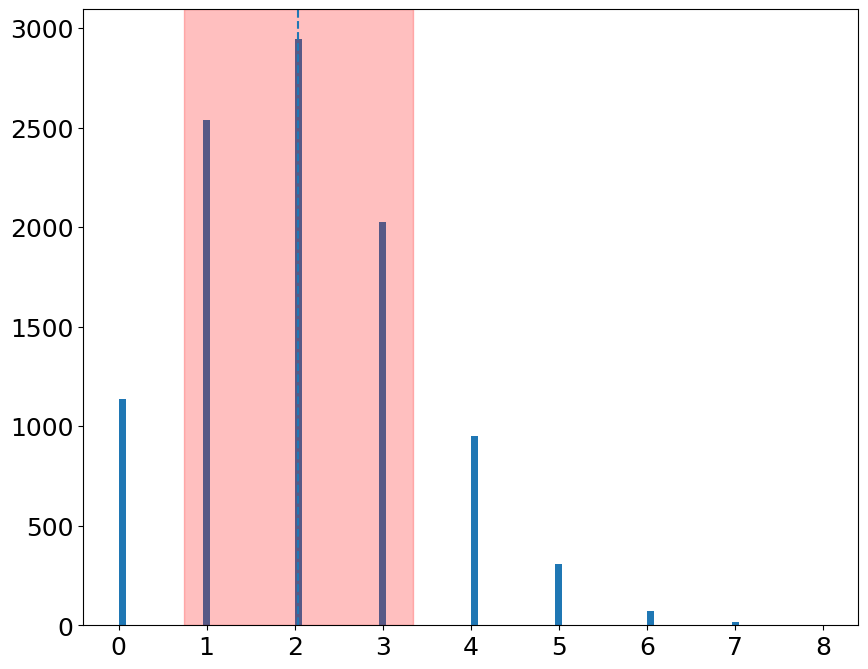

In [8]:
pl.hist(x, bins=100)
mean = N*p
std = np.sqrt(N*p*(1-p))
print(mean, std)
pl.axvline(mean, ls='--')
pl.axvspan(mean-std, mean+std, color='r', alpha=0.25)

5 2.23606797749979


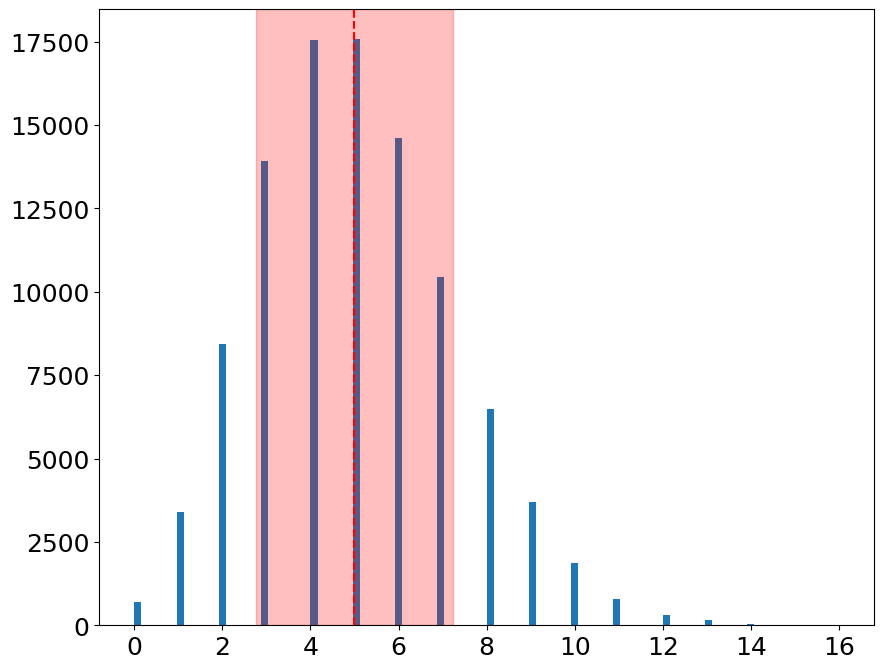

In [9]:
# poisson distribution
nu = 5
x = np.random.poisson(nu, size=100000)
_ = pl.hist(x, bins=100)
mean = nu
std = np.sqrt(nu)
print(mean, std)
pl.axvline(mean, ls='--', color='r')
pl.axvspan(mean-std, mean+std, color='r', alpha=0.25)

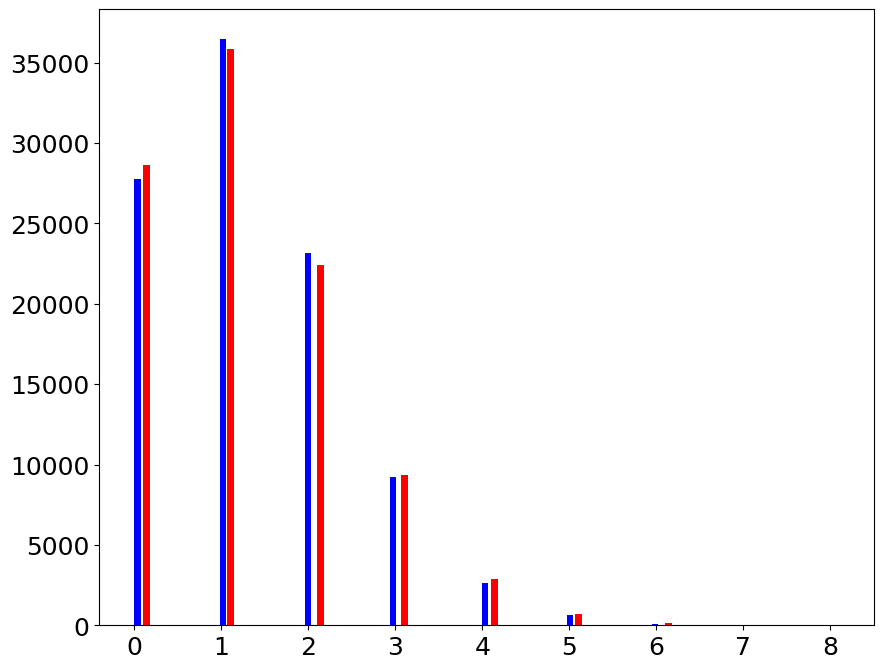

In [13]:
N = 25
p = 0.05
x_b = np.random.binomial(N, p, size=100000)
x_p = np.random.poisson(N*p, size=100000)
_ = pl.hist(x_b, bins=100, color='b')
_ = pl.hist(x_p + 0.1, bins=100, color='r')

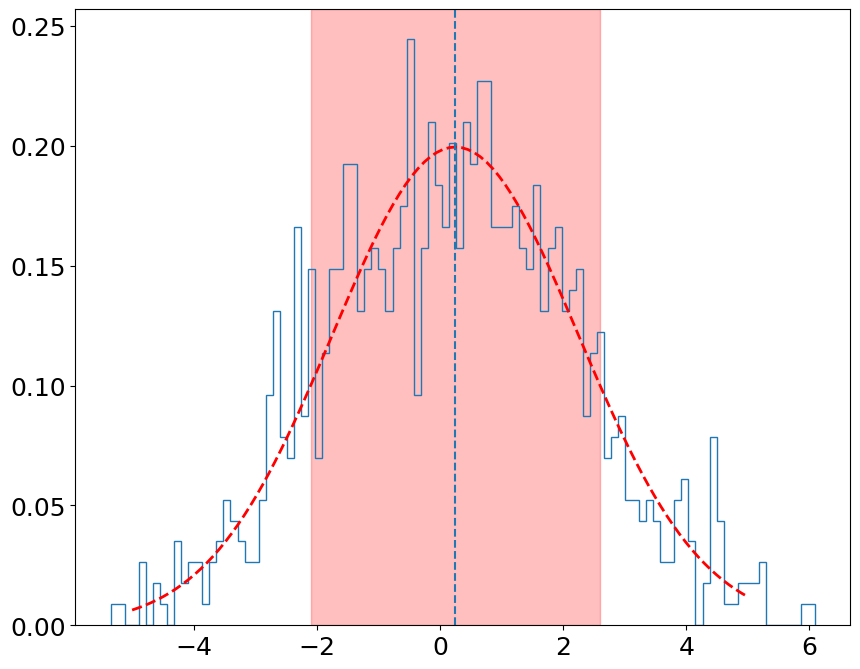

In [14]:
# Gaussian
mean = 0.25
sigma = 2.
x = np.random.normal(loc=mean, scale=sigma, size=1000)
_ = pl.hist(x, bins=100, histtype='step', density=True)
f = stats.norm(0.25, 2.)
xx = np.linspace(-5, 5., 100)
pl.plot(xx, f.pdf(xx), ls='--', color='r', lw=2)
pl.axvline(mean, ls='--')
pl.axvspan(mean-std, mean+std, color='r', alpha=0.25)

# Why are gaussians that important : Because of the central limit theorem

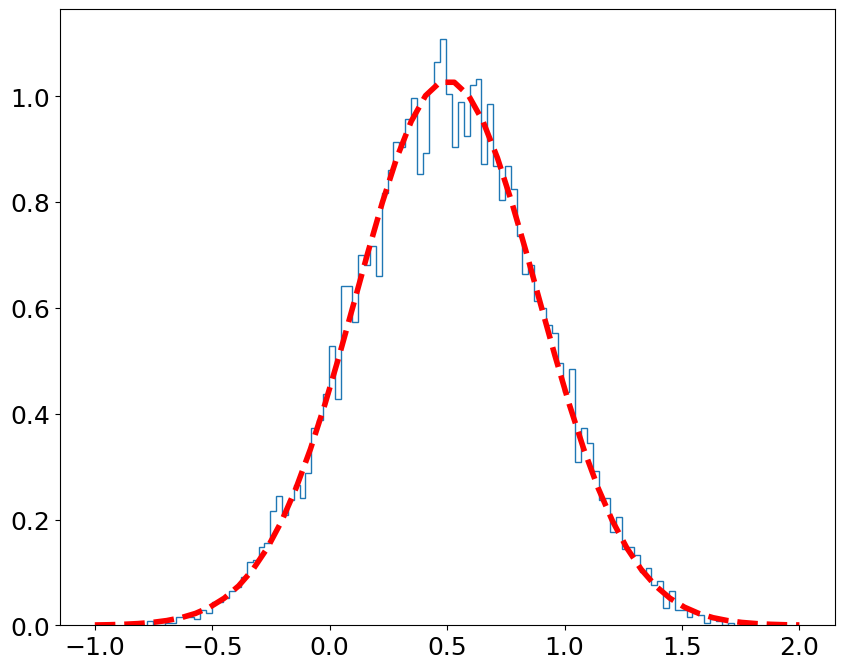

In [16]:
N_realizations = 10000
N_samples_per_realization = 5

a, b = -1., 2.
mean = 0.5 * (a+b)
sigma = np.sqrt((b - a)**2 / 12.)

y = np.zeros(N_realizations)
for i in range(N_realizations):
    x = np.random.uniform(a, b, size=N_samples_per_realization)
    y[i] = x.mean()
    
_ = pl.hist(y, bins=100, histtype='step', density=True)
sigma_y = sigma / np.sqrt(N_samples_per_realization)

xx = np.linspace(-1., 2.)
gauss = 1. / np.sqrt(2 * np.pi * sigma_y**2) * np.exp(-0.5 * (xx-mean)**2/sigma_y**2)
pl.plot(xx, gauss, color='r', ls='--', lw=4)